In [1]:
# MNIST 학습
if '__file__' in globals():
    import os, sys
    sys.path.append(os.path.join(os.path.dirname(__file__), '..'))

import dezero
import dezero.functions as F
from dezero import optimizers
from dezero import DataLoader
from dezero.models import MLP

![그림 51-1](./img/51-1.png)

60000
10000
<class 'numpy.ndarray'> (1, 28, 28)
5
label: 5


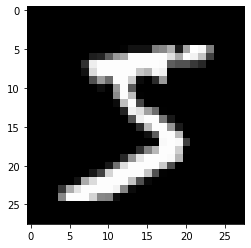

In [8]:
# MNIST 데이터셋
import dezero
import matplotlib.pyplot as plt

train_set = dezero.datasets.MNIST(train=True, transform=None)   # transform=None : 아무런 전처리도 하지 않음
test_set = dezero.datasets.MNIST(train=False, transform=None)

print(len(train_set))
print(len(test_set))

x, t = train_set[0]
print(type(x), x.shape)
print(t)

plt.imshow(x.reshape(28, 28), cmap='gray')
plt.show
print(f'label: {t}')

def f(x):
    x = x.flatten()             # (1,28,28) -> (784,)
    x = x.astype(np.float32)    # np.float32로 변환
    x = x.astype(np.float32)    # np.float32로 변환
    x /= 255.0                  # 0.0 ~ 1.0 사이가 되도록
    return x

train_set = dezero.datasets.MNIST(train=True, transform=f)
test_set = dezero.datasets.MNIST(train=False, transform=f)

In [9]:
# MMIST 학습
import dezero
import dezero.functions as F
from dezero import optimizers
from dezero import DataLoader
from dezero.models import MLP

max_epoch = 5
batch_size = 100
hidden_size = 1000

train_set = dezero.datasets.MNIST(train=True)
test_set = dezero.datasets.MNIST(train=False)
train_loader = DataLoader(train_set, batch_size)
test_loader = DataLoader(test_set, batch_size, shuffle=False)

model = MLP((hidden_size, 10))
optimizer = optimizers.SGD().setup(model)
#model = MLP((hidden_size, hidden_size, 10), activation=F.relu)
#optimizer = optimizers.Adam().setup(model)

for epoch in range(max_epoch):
    sum_loss, sum_acc = 0, 0

    for x, t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        acc = F.accuracy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(t)
        sum_acc += float(acc.data) * len(t)

    print('epoch: {}'.format(epoch+1))
    print('train loss: {:.4f}, accuracy: {:.4f}'.format(
        sum_loss / len(train_set), sum_acc / len(train_set)))

    sum_loss, sum_acc = 0, 0
    with dezero.no_grad():
        for x, t in test_loader:
            y = model(x)
            loss = F.softmax_cross_entropy(y, t)
            acc = F.accuracy(y, t)
            sum_loss += float(loss.data) * len(t)
            sum_acc += float(acc.data) * len(t)

    print('test loss: {:.4f}, accuracy: {:.4f}'.format(
        sum_loss / len(test_set), sum_acc / len(test_set)))

epoch: 1
train loss: 1.9144, accuracy: 0.5474
test loss: 1.5412, accuracy: 0.6889
epoch: 2
train loss: 1.2818, accuracy: 0.7721
test loss: 1.0412, accuracy: 0.8132
epoch: 3
train loss: 0.9227, accuracy: 0.8208
test loss: 0.7900, accuracy: 0.8432
epoch: 4
train loss: 0.7382, accuracy: 0.8427
test loss: 0.6554, accuracy: 0.8624
epoch: 5
train loss: 0.6335, accuracy: 0.8550
test loss: 0.5747, accuracy: 0.8706


![식 51.1](./img/51.1.png)

In [ ]:
class ReLU(Function):
    def forward(self, x):
        xp = cuda.get_array_module(x)
        y = xp.maximum(x, 0.0)              # x와 0.0 중 큰 쪽을 반환
        return y

    def backward(self, gy):
        x, = self.inputs
        mask = x.data > 0           # x에서 0보다 큰 원소에 해당하는 위치의 기울기는 그대로 보내고, 0이하 라면 기울기를 0으로 설정
        gx = gy * mask
        return gx

def relu(x):
    return ReLU()(x)

In [14]:
# 모델 개선
# sigmoid -> ReLU, 층수를 늘리고 Adam Optimizer 사용

import dezero
import dezero.functions as F
from dezero import optimizers
from dezero import DataLoader
from dezero.models import MLP

max_epoch = 5
batch_size = 100
hidden_size = 1000

train_set = dezero.datasets.MNIST(train=True)
test_set = dezero.datasets.MNIST(train=False)
train_loader = DataLoader(train_set, batch_size)
test_loader = DataLoader(test_set, batch_size, shuffle=False)

# model = MLP((hidden_size, 10))
# optimizer = optimizers.SGD().setup(model)
model = MLP((hidden_size, hidden_size, 10), activation=F.relu)
optimizer = optimizers.Adam().setup(model)

for epoch in range(max_epoch):
    sum_loss, sum_acc = 0, 0

    for x, t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        acc = F.accuracy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(t)
        sum_acc += float(acc.data) * len(t)

    print('epoch: {}'.format(epoch+1))
    print('train loss: {:.4f}, accuracy: {:.4f}'.format(
        sum_loss / len(train_set), sum_acc / len(train_set)))

    sum_loss, sum_acc = 0, 0
    with dezero.no_grad():
        for x, t in test_loader:
            y = model(x)
            loss = F.softmax_cross_entropy(y, t)
            acc = F.accuracy(y, t)
            sum_loss += float(loss.data) * len(t)
            sum_acc += float(acc.data) * len(t)

    print('test loss: {:.4f}, accuracy: {:.4f}'.format(
        sum_loss / len(test_set), sum_acc / len(test_set)))

epoch: 1
train loss: 0.1926, accuracy: 0.9412
test loss: 0.0929, accuracy: 0.9691
epoch: 2
train loss: 0.0719, accuracy: 0.9774
test loss: 0.0942, accuracy: 0.9695
epoch: 3
train loss: 0.0491, accuracy: 0.9842
test loss: 0.0761, accuracy: 0.9764
epoch: 4
train loss: 0.0341, accuracy: 0.9890
test loss: 0.0730, accuracy: 0.9799
epoch: 5
train loss: 0.0299, accuracy: 0.9902
test loss: 0.0752, accuracy: 0.9784


![그림 p428](./img/p428.png)    

In [ ]:
# Define-by-Run 받식의 자동 미분
import torch

x = torch.randn(1, requires_grad = True) # 무작위 수로 초기하된 텐서 생성

y = x

for i in range(5):
    y = y * 2

y.backward()
print(x.grad)

![그림 D-1](./img/D-1.png)  
![그림 D-3](./img/D-3.png)  
![그림 D-4](./img/D-4.png)  
